In [101]:
from pathlib import Path
from random import random

from sklearn.preprocessing import StandardScaler

file = Path('/Users/mateuszkwiatkowski/Projects/playground/kaggle/diabetes/diabetes.csv')
if not file.is_file():
    import zipfile
    with zipfile.ZipFile('/Users/mateuszkwiatkowski/Projects/datasets/archive.zip', 'r') as zip_ref:
        zip_ref.extractall('/Users/mateuszkwiatkowski/Projects/playground/kaggle/diabetes')

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [103]:
df = pd.read_csv('diabetes.csv')

## EDA

In [104]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [107]:
df.shape

(768, 9)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
df_no_target = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_no_target, df['Outcome'], stratify=df['Outcome'], test_size=0.2)
X_train_df = pd.DataFrame(X_train, columns=df_no_target.columns)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

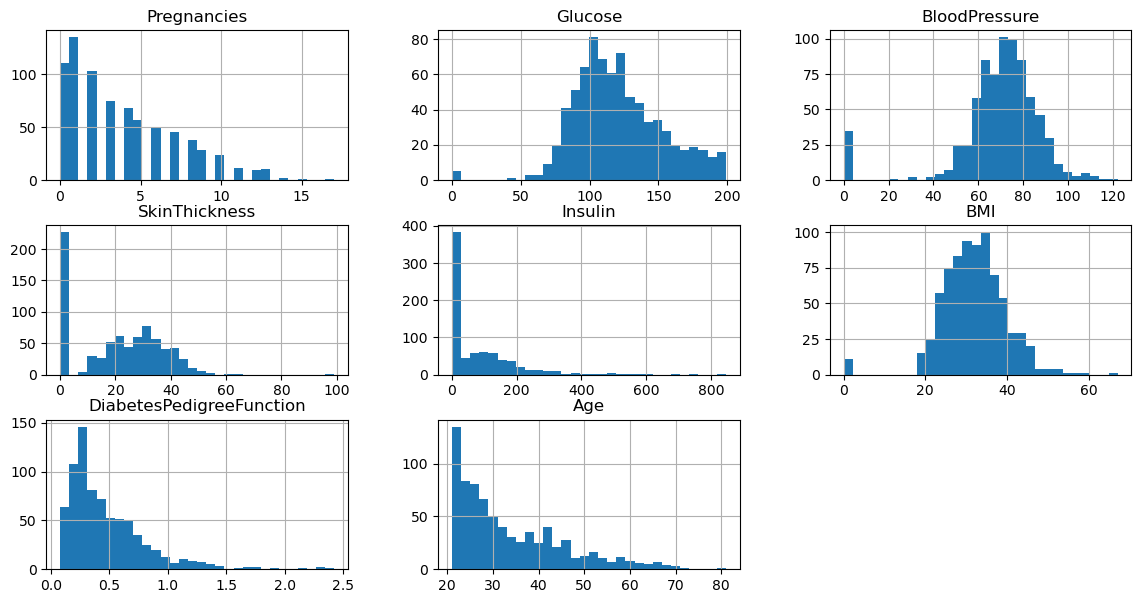

In [110]:
df.drop(['Outcome'], axis=1).hist(figsize=(14, 7), bins=30)

In [111]:
(df.BloodPressure == 0).sum()

35

In [112]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [113]:
from pandas.plotting import scatter_matrix

In [114]:
corr_matrix = df.corr()

In [115]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>],
       [<Axes: xlabel='Pregnancies', ylabel='BloodPressure'>,
        <Axes: xlabel=

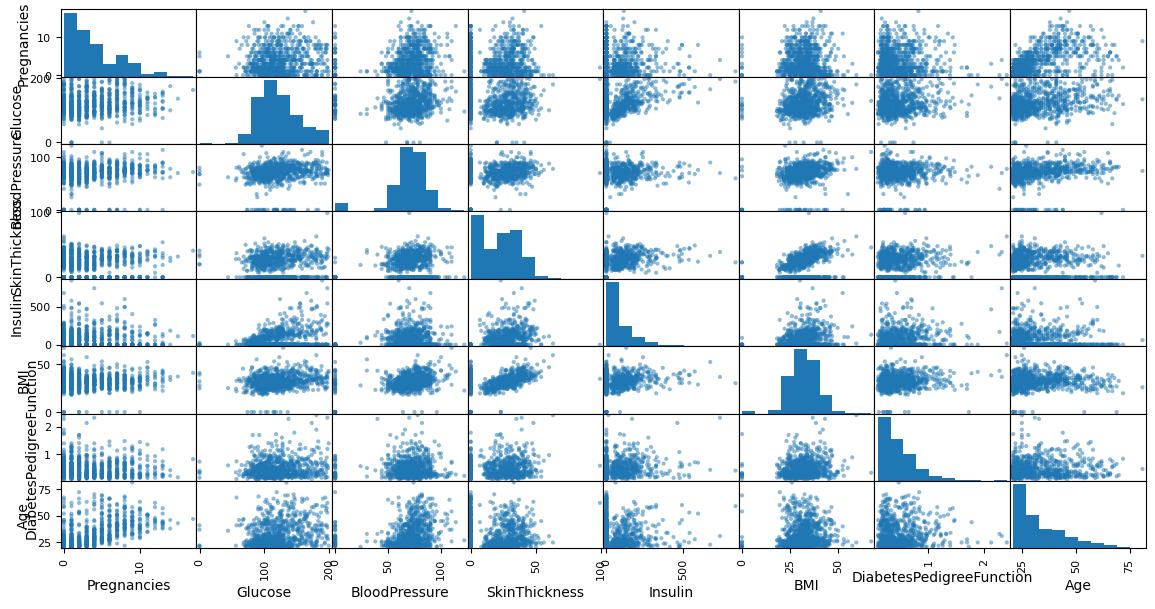

In [116]:
attributes = df_no_target.columns
scatter_matrix(df[attributes], figsize=(14, 7))

In [117]:
attributes

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## Data Preparation

In [118]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer

In [119]:
class ZeroToNanImputer(TransformerMixin):
    def fit(self, X, y=None):
          return self

    def transform(self, X, y=None):
        cols = X.columns
        X = np.where(X == 0, np.nan, X)
        return pd.DataFrame(X, columns=cols)

In [120]:
imputable_features = X_train_df.drop(['Pregnancies', 'Age'], axis=1).columns
log_transformation_features = ['Age']
back_to_zero_features = ['Pregnancies', 'Age']

preprocessing = ColumnTransformer([
    ('imputable_features', KNNImputer(), imputable_features),
    ('back_to_zero', SimpleImputer(strategy='constant', fill_value=0), back_to_zero_features)
])

preprocessing_pipeline = Pipeline([
    ('zero_to_nan', ZeroToNanImputer()),
    ('preprocessing', preprocessing),
    ('scaler', StandardScaler()),
])

In [121]:
X = preprocessing_pipeline.fit_transform(X_train_df)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

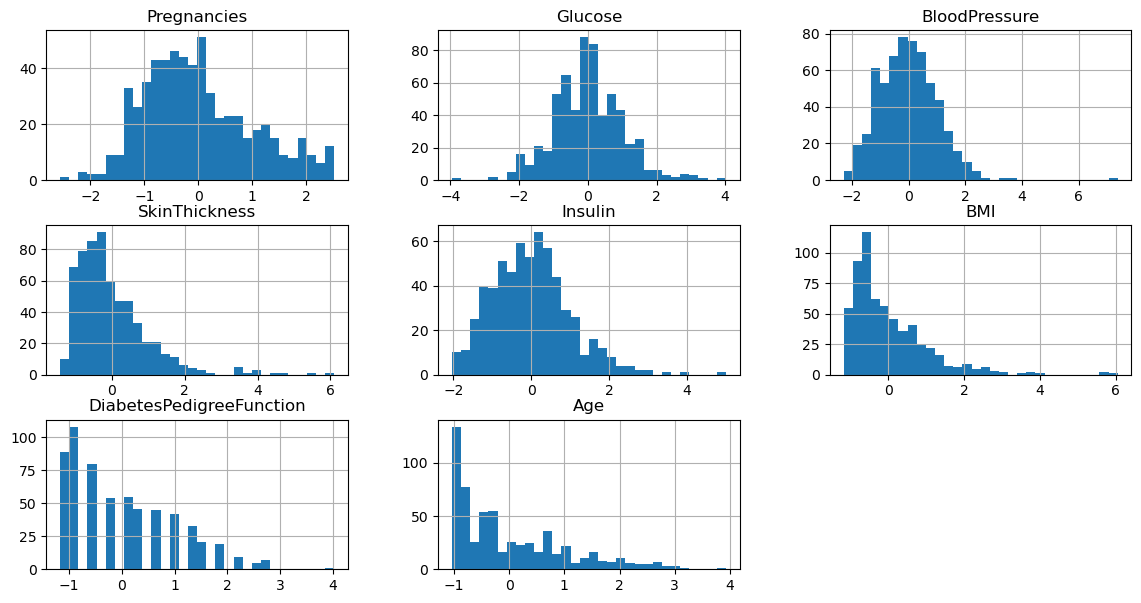

In [122]:
pd.DataFrame(X, columns=X_train_df.columns).hist(figsize=(14, 7), bins=30)

## Training Models

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score

In [124]:
models = (
    LogisticRegression(), 
    DecisionTreeClassifier(max_depth=10, min_samples_split=3), 
    LinearSVC(), 
    SVC(kernel='poly', degree=3, C=1),
    SVC(kernel='rbf', gamma=0.02, C=1),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=3, n_jobs=-1),
    AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10, min_samples_split=3), n_estimators=100, learning_rate=0.5, algorithm='SAMME'),
    BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10, min_samples_split=3), n_estimators=100, n_jobs=-1),
    GradientBoostingClassifier(max_depth=2, learning_rate=0.05, n_estimators=500, n_iter_no_change=10)
)

In [125]:
scores = {}
best_estimators_amount = 3

for idx, model in enumerate(models):
    model.fit(X, y_train)
    print('-'*100)   
    score = np.mean(cross_val_score(model, X, y_train, cv=5))
    print(models[idx], f'\nscore: {score}')
    scores[model] = score
    
scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True))
print('*'*100)   
first_three = list(scores.items())[:best_estimators_amount]
for name, score in first_three:
    print(name, score)
print('*'*100)   

----------------------------------------------------------------------------------------------------
LogisticRegression() 
score: 0.7524856723977076
----------------------------------------------------------------------------------------------------
DecisionTreeClassifier(max_depth=10, min_samples_split=3) 
score: 0.7068772491003598
----------------------------------------------------------------------------------------------------
LinearSVC() 
score: 0.7606157536985206
----------------------------------------------------------------------------------------------------
SVC(C=1, kernel='poly') 
score: 0.7279888044782087
----------------------------------------------------------------------------------------------------
SVC(C=1, gamma=0.02) 
score: 0.7590030654404905
----------------------------------------------------------------------------------------------------
KNeighborsClassifier() 
score: 0.7248300679728109
-------------------------------------------------------------------------

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
def grid_search(estimator, params, X, y):
    clf = GridSearchCV(estimator, params)
    clf.fit(X, y)
    print(clf.best_params_)
    
    return clf.best_estimator_

## SVM Model Grid Search

In [128]:
svm_clf_param = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 10, 100, 1000],
}
grid_search(SVC(), svm_clf_param, X, y_train)

{'C': 1, 'kernel': 'linear'}


SVC(C=1, kernel='linear')

In [129]:
svm_clf_param = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

svm_clf = grid_search(SVC(kernel='rbf'), svm_clf_param, X, y_train)


{'C': 1, 'gamma': 0.1}


## Random Forest Model Grid Search

In [ ]:
rm_clf_param = {
    'n_estimators': [100, 200],
    'max_depth': [4, 5, 6, 7], 
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
}

rm_clf = grid_search(RandomForestClassifier(n_jobs=-1), rm_clf_param, X, y_train)

In [86]:
print('RM: ', np.mean(cross_val_score(rm_clf, X, y_train, cv=5)))
print('SVM: ', np.mean(cross_val_score(svm_clf, X, y_train, cv=5)))

RM:  0.7638677862188459
SVM:  0.7752499000399841


## Final Model Test

In [100]:
X_test_final = preprocessing_pipeline.transform(X_test)
print(svm_clf.score(X_test_final, y_test))

0.7597402597402597
